<a href="https://colab.research.google.com/github/KIRAN-MK-211/ML_B2_1BM19CS073_KIRAN_MK/blob/main/WeightedRegression/WeightedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr

In [2]:
def kernel(point,xmat, k):
 m,n = np1.shape(xmat)
 weights = np1.mat(np1.eye((m)))
 for j in range(m):
    diff = point - X[j]
    weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
 return weights

In [3]:
def localWeight(point,xmat,ymat,k):
 wei = kernel(point,xmat,k)
 W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
 return W

In [4]:
def localWeightRegression(xmat,ymat,k):
 m,n = np1.shape(xmat)
 ypred = np1.zeros(m)
 for i in range(m):
    ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
 return ypred

In [5]:
# load data points
data = pd.read_csv('/content/tips.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)

In [6]:
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1]
# print(m) 244 data is stored in m
one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
#print(X)
#set k here
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

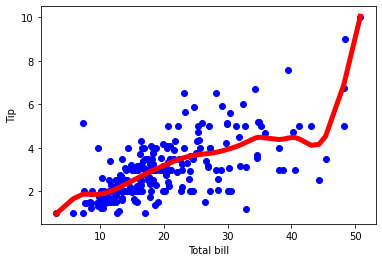

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()
